In [111]:
# import the basic libraries
import numpy as np
import matplotlib as plt
import pandas as pd

In [112]:
# 01 Load the dataset
data = pd.read_csv('housing.csv')
# print the dataset
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [ ]:
#02 Print the summary of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [ ]:
# 03 Print the Data Shape
print (data.shape)

(20640, 10)


In [ ]:
# 04 Basic statistics of dataset
print(data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [ ]:
# 05 Print the columns
print(data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [ ]:
# Iterate all columns
for column in data.columns:
  print(data[column].value_counts())
  print("*"*40)

longitude
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.54      1
-115.94      1
-115.99      1
-116.81      1
-123.71      1
Name: count, Length: 844, dtype: int64
****************************************
latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.01      1
41.36      1
41.13      1
40.30      1
35.88      1
Name: count, Length: 862, dtype: int64
****************************************
housing_median_age
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244


In [ ]:
# 06 Print the null values in the data
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# 07 Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# 08 THEN SHOW THE NULL VALUES
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
# 09 Identify the duplicated data
print(data.duplicated().sum())

0


In [ ]:
#10 Then after removing the null values data
print(data.shape)

(20433, 10)


In [ ]:
# 11 Label encoder to encode the ocean proximity
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])


In [109]:
# After encoding the ocean Proximity
data.ocean_proximity.value_counts()

ocean_proximity
0    9034
1    6496
4    2628
3    2270
2       5
Name: count, dtype: int64

In [ ]:
#12 Separate the features and target variable
from sklearn.model_selection import train_test_split
df = pd.DataFrame(data)
x = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']


In [ ]:
print(x)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean

In [ ]:
print(y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64


In [ ]:
#13 Split the dataset in to training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16346, 9)
(16346,)
(4087, 9)
(4087,)


In [ ]:
#14 Join the train feature and target variable
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,0,259900.0
12478,-121.48,38.59,52.0,1186.0,341.0,1038.0,320.0,1.6116,1,70500.0
5996,-117.73,34.09,36.0,1543.0,297.0,1355.0,303.0,3.5313,1,117800.0
11827,-121.02,39.01,17.0,4786.0,799.0,2066.0,770.0,3.9734,1,185400.0
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,0,94200.0
...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,4323.0,775.0,1479.0,663.0,6.0758,1,226800.0
19844,-119.09,36.42,17.0,877.0,219.0,966.0,218.0,2.0000,1,52500.0
9944,-122.26,38.16,23.0,2840.0,491.0,1586.0,466.0,4.0337,3,130400.0
10908,-117.86,33.74,9.0,525.0,171.0,1257.0,165.0,3.3750,0,165300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

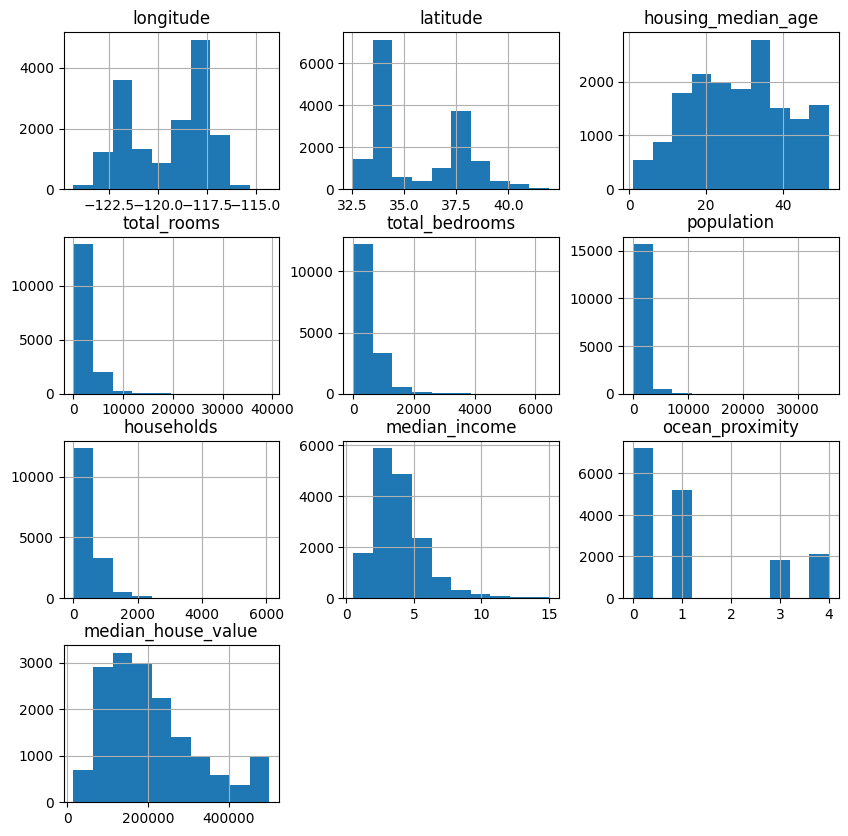

In [ ]:
#15 create the histogram of the data
train_data.hist(figsize=(10,10))

<Axes: >

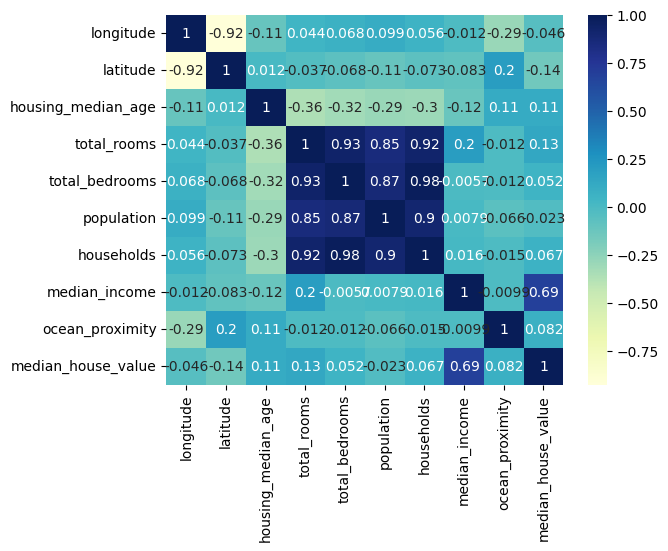

In [ ]:
#16 Create a heatmap to visualize the corr(correlation) of the data
import seaborn as sns
sns.heatmap(train_data.corr(),annot=True ,cmap ="YlGnBu")

<Axes: xlabel='longitude', ylabel='latitude'>

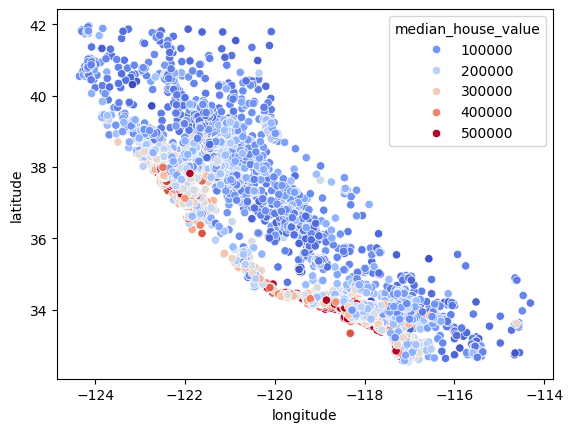

In [ ]:
#17 create scatter plot of longitude on x-axis and latitude on y-axis
import matplotlib as plt

sns.scatterplot(data = train_data,x="longitude",y = "latitude",hue='median_house_value',palette = 'coolwarm')

In [ ]:
#17
#Calculate the ratio of total bedrooms to total rooms
train_data['bedroom_Ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
# Calculate the ratio of total rooms to households
train_data['household_Ratio'] = train_data['total_rooms']/train_data['households']

<Axes: >

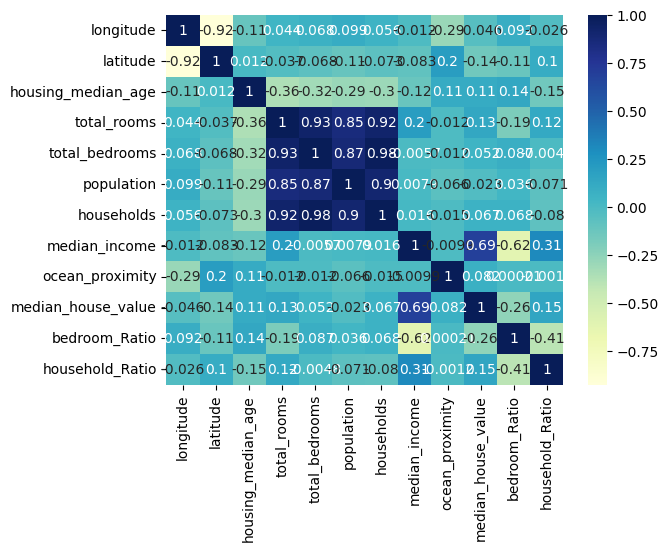

In [ ]:
# create the heatmap to visualize the correlation of the data
sns.heatmap(train_data.corr(),annot=True ,cmap ="YlGnBu")

In [110]:
# 18
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

# Separate the features and target variable
x_train , y_train = train_data.drop(['median_house_value'],axis = 1),train_data['median_house_value']
# Standardize the features
x_train_s = scalar.fit_transform(x_train)
model = LinearRegression()
# Train the model on training data
model.fit(x_train_s,y_train)

LinearRegression()

In [ ]:
#19
# Join the test feature and target variable
test_data = x_test.join(y_test)
#Calculate the ratio of total bedrooms to total rooms
test_data['bedroom_Ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
# Calculate the ratio of total rooms to households
test_data['household_Ratio'] = test_data['total_rooms']/test_data['households']
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_Ratio,household_Ratio
14185,-117.08,32.70,37.0,2176.0,418.0,1301.0,375.0,2.8750,4,98900.0,0.192096,5.802667
6125,-117.91,34.11,20.0,3158.0,684.0,2396.0,713.0,3.5250,0,153000.0,0.216593,4.429173
14095,-117.10,32.75,11.0,2393.0,726.0,1905.0,711.0,1.3448,4,91300.0,0.303385,3.365682
14359,-117.22,32.74,52.0,1260.0,202.0,555.0,209.0,7.2758,4,345200.0,0.160317,6.028708
18004,-121.99,37.29,32.0,2930.0,481.0,1336.0,481.0,6.4631,0,344100.0,0.164164,6.091476
...,...,...,...,...,...,...,...,...,...,...,...,...
19533,-120.91,37.66,36.0,1320.0,255.0,720.0,232.0,2.6523,1,76300.0,0.193182,5.689655
7695,-118.11,33.96,29.0,2784.0,582.0,1278.0,550.0,4.3882,0,261600.0,0.209052,5.061818
15558,-117.07,33.12,12.0,2453.0,599.0,1251.0,529.0,2.4122,0,127000.0,0.244191,4.637051
16731,-120.49,35.35,17.0,3043.0,608.0,1457.0,545.0,3.1641,0,158600.0,0.199803,5.583486


In [103]:
# 20 Separate the features and target variable
x_test , y_test = test_data.drop(['median_house_value'],axis = 1),test_data['median_house_value']
# Standardize the features
x_test_s = scalar.fit_transform(x_test)
#Predict the target variable
model.score(x_test_s,y_test)

0.6510046553486348

In [105]:
# 21 Model  Evalution
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred_train = model.predict(x_train_s)
y_pred_test = model.predict(x_test_s)

# Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# R^2 Score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print("Training Mean Squared Error:", mse_train)
print("Testing Mean Squared Error:", mse_test)
print("Training R^2 Score:", r2_train)
print("Testing R^2 Score:", r2_test)


Training Mean Squared Error: 4718452400.1408205
Testing Mean Squared Error: 4672938091.2262745
Training R^2 Score: 0.6454487075230887
Testing R^2 Score: 0.6510046553486348
